<a href="https://colab.research.google.com/github/ikrimaa/data-science-portfolio/blob/main/Gofood_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARATION SET UP

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Case Study Chapter 3 Topic 1_ Dataset Gofood.csv to Case Study Chapter 3 Topic 1_ Dataset Gofood.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Case Study Chapter 3 Topic 1_ Dataset Gofood.csv']))

In [ ]:
df = pd.read_csv('Case Study Chapter 3 Topic 1_ Dataset Gofood.csv')

# EDA INVESTIGATION

## Structure

### Dataset Attributes

In [ ]:
df.shape

(45195, 9)

Jadi kita tahu bahwa dataset ini memiliki 45195 baris dan 9 fitur. dan berapa banyak tipe data berbeda yang terkandung dalam 9 fitur ini?

In [ ]:
#menghitung berapaka kali setiap tipe muncul pada dataset
pd.value_counts(df.dtypes)

object     6
float64    2
int64      1
dtype: int64

In [ ]:
df.columns

Index(['merchant_name', 'merchant_area', 'category', 'display', 'product',
       'price', 'discount_price', 'isDiscount', 'description'],
      dtype='object')

Terdapat 3 Numeric 6 non-numerical

##### Non-numerical Features

In [ ]:
df.select_dtypes(exclude="number").head()

,merchant_name,merchant_area,category,display,product,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,Sajian Susu Coklat Milo Plus Espresso Dengan R...


In [ ]:
df.describe(exclude="number")

,merchant_name,merchant_area,category,display,product,description
count,45195,45195,45195,45195,45195,21720
unique,687,3,333,2986,23917,12362
top,"Michelle Bakery, Cimanggis",medan,Roti,Minuman,Nasi Putih,Pcs
freq,474,15945,4308,1770,106,252


##### Numerical Features

Proses ini melihat berapa banyak nilai unik yang dimiliki masing-masing fitur numeriknya. Proses akan memberikan beberapa wawasan tentang jumlah fitur biner (2 nilai unik), ordinal (3 hingga ~10 nilai unik) dan kontinu (lebih dari 10 nilai unik) dalam kumpulan data.

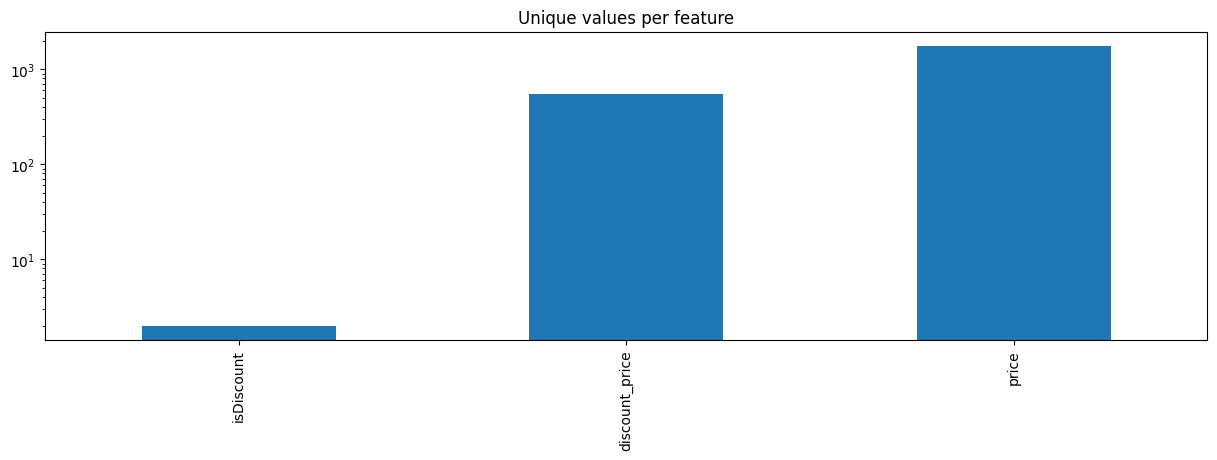

In [ ]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( logy=True, figsize=(15, 4), title="Unique values per feature");

## Quality

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


### Check Duplicate

In [ ]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=["merchant_name"], axis=1).duplicated().sum()
print(f"Sepertinya Anda memiliki {n_duplicates} duplikat pada dataset.")

Sepertinya Anda memiliki 8915 duplikat pada dataset.


dari hasil tersebut, maka dibutuhkan handle duplicate pada tahap preprocessing

### Missing Value

##### Per-sample

In [ ]:
df.isna().sum()

merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    42457
isDiscount            0
description       23475
dtype: int64

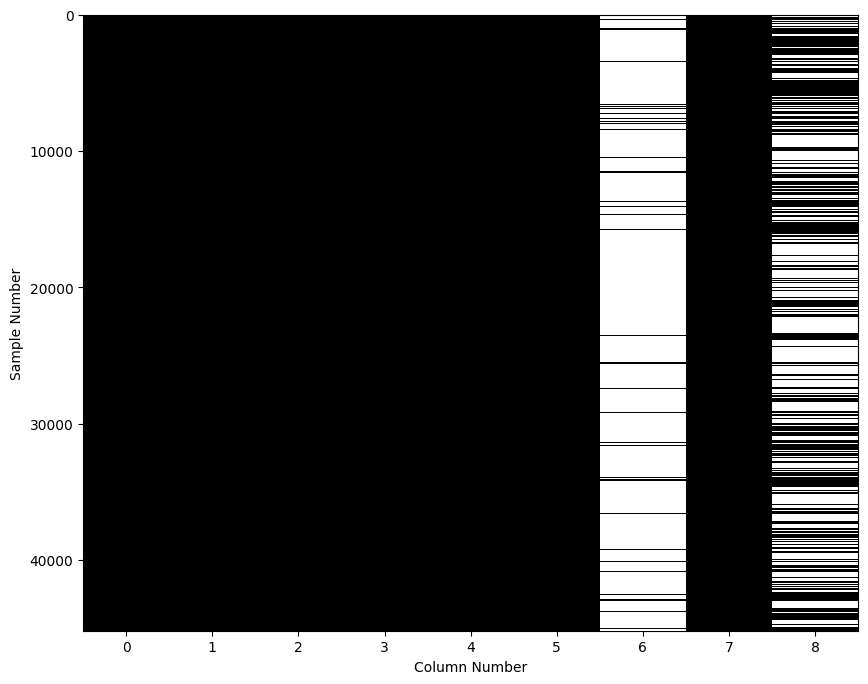

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

##### Per-features

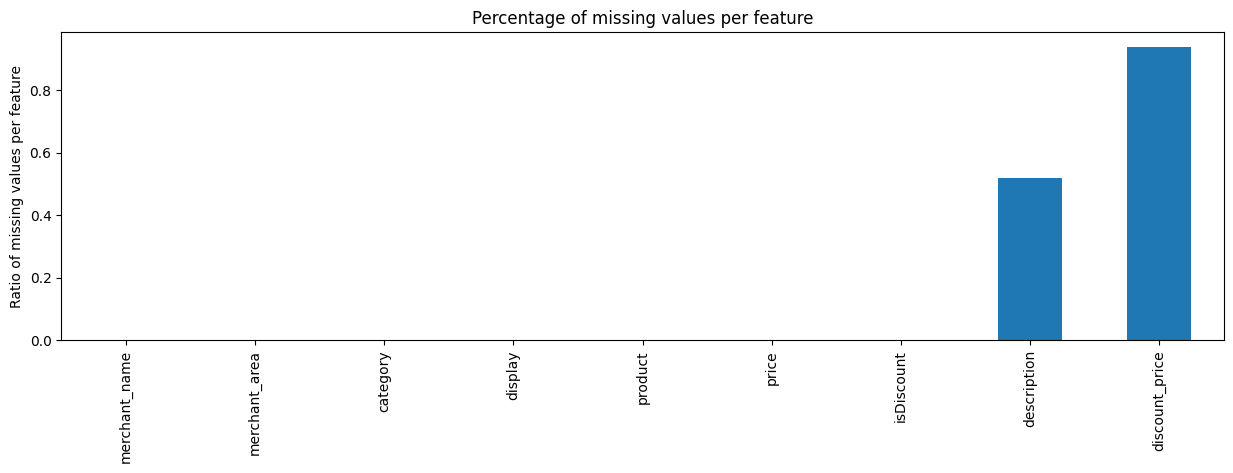

In [ ]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

## Content

### Preprocessing

In [ ]:

df[['brand','location']] = df['merchant_name'].str.split(',',expand=True,n=2)
# df.drop(['discount_price','description'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
 9   brand           45195 non-null  object 
 10  location        32385 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.8+ MB


### Gofood Revenue By Merchant Area
*without discount price

Text(0.5, 1.0, 'Revenue Merchant Area Gofood ***withoutdiscount_price**')

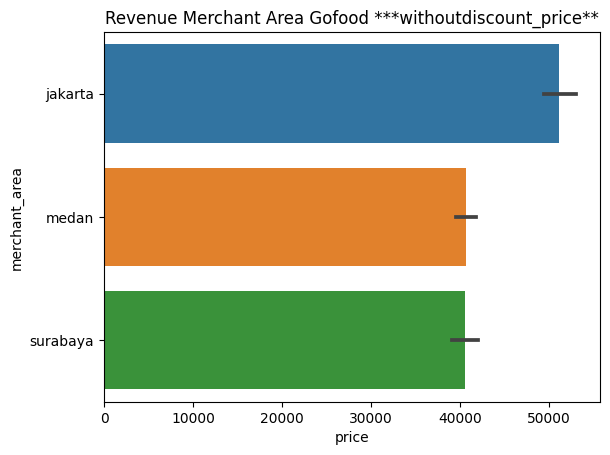

In [ ]:
dftotal = df.groupby(['merchant_area']).sum().sort_values(by = 'price', ascending=False)
dftotal = dftotal.reset_index()
  
# plot barplot
sns.barplot(x = "price", y = "merchant_area", data = df)
plt.title("Revenue Merchant Area Gofood ***withoutdiscount_price**")

### Gofood Revenue By Brand

Text(0.5, 1.0, 'TOP 10 Brand revenue at Gofood')

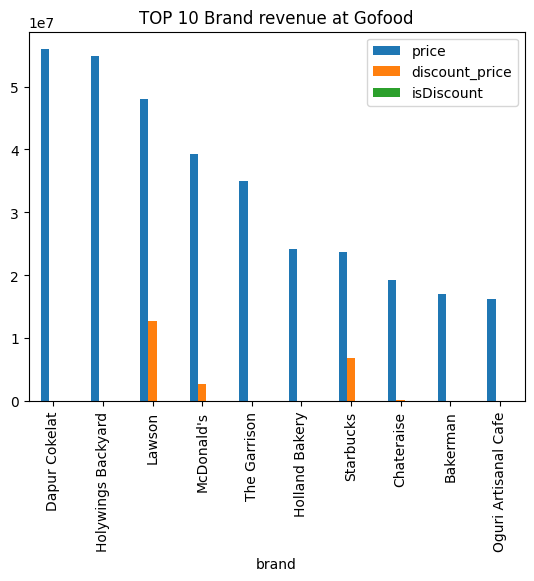

In [ ]:
df_jkt = df[df['merchant_area'].str.contains('jakarta')]
df_jkt = df_jkt.groupby(['brand']).sum().sort_values(by = 'price', ascending=False)
df_jkt.head(10).plot(kind='bar')
plt.title("TOP 10 Gofood Brand revenue in Jakarta")

Text(0.5, 1.0, 'TOP 10 Gofood Brand revenue in Surabaya')

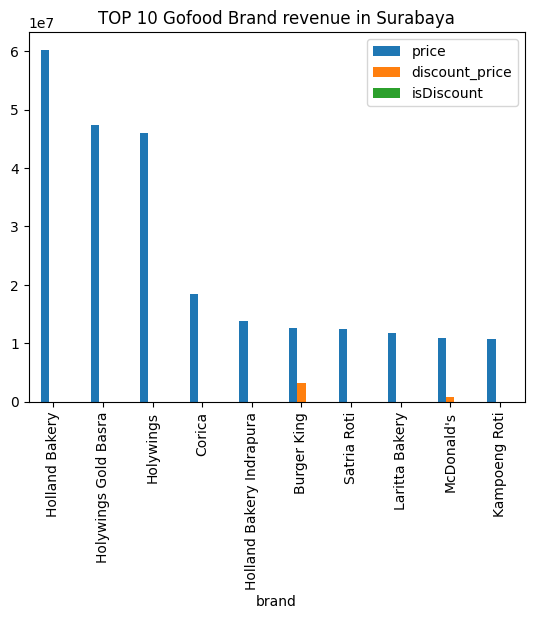

In [ ]:
df_sby = df[df['merchant_area'].str.contains('surabaya')]
df_sby = df_sby.groupby(['brand']).sum().sort_values(by = 'price', ascending=False)
df_sby.head(10).plot(kind='bar')
plt.title("TOP 10 Gofood Brand revenue in Surabaya")

Text(0.5, 1.0, 'TOP 10 Gofood Brand revenue in Medan')

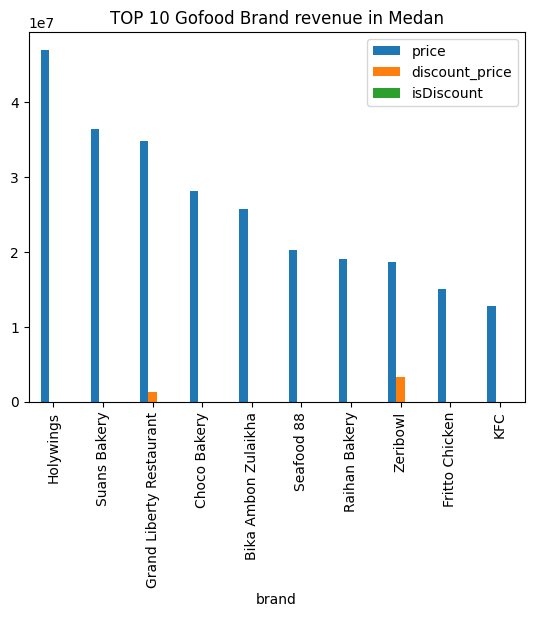

In [ ]:
df_mdn = df[df['merchant_area'].str.contains('medan')]
df_mdn = df_mdn.groupby(['brand']).sum().sort_values(by = 'price', ascending=False)
df_mdn.head(10).plot(kind='bar')
plt.title("TOP 10 Gofood Brand revenue in Medan")

### Most Brand Repeat Order

In [ ]:
most_brand= pd.DataFrame(df.groupby('merchant_area')['brand'].value_counts().unstack(fill_value=0).T)

In [ ]:
jkt = most_brand.sort_values(['jakarta'],ascending=False).head(5)
mdn = most_brand.sort_values(['medan'],ascending=False).head(5)
sby = most_brand.sort_values(['surabaya'],ascending=False).head(5)

'Jakarta most Brand repeat order ? '

merchant_area,jakarta,medan,surabaya
brand,,,
Lawson,1795,0,0
McDonald's,905,125,250
Dapur Cokelat,549,0,0
Michelle Bakery,474,0,0
KFC,393,400,63


<Axes: xlabel='brand'>

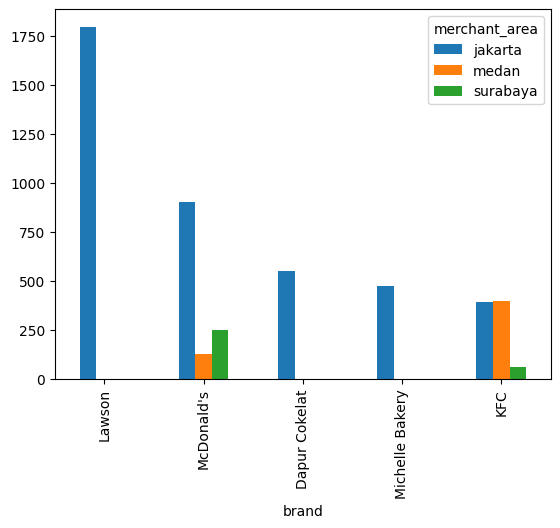

In [ ]:
display('Jakarta most Brand repeat order ? ', jkt)
jkt.plot(kind='bar')

'Medan most Brand repeat order ? '

merchant_area,jakarta,medan,surabaya
brand,,,
Choco Bakery,0,592,0
Bika Ambon Zulaikha,0,435,0
Zeribowl,0,426,0
Fritto Chicken,0,400,0
KFC,393,400,63


<Axes: xlabel='brand'>

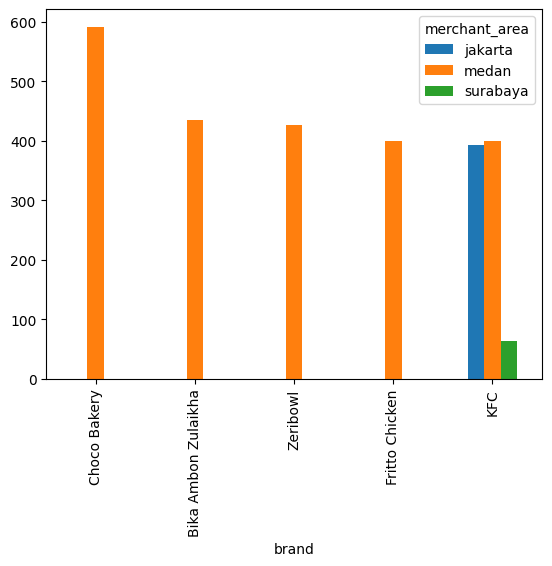

In [ ]:
display('Medan most Brand repeat order ? ', mdn)
mdn.plot(kind='bar')

'Surabaya most Brand repeat order ? '

merchant_area,jakarta,medan,surabaya
brand,,,
Holland Bakery,240,0,594
Kampoeng Roti,0,0,331
Haus!,0,0,273
Satria Roti,0,0,257
Warung Pindo,0,0,254


<Axes: xlabel='brand'>

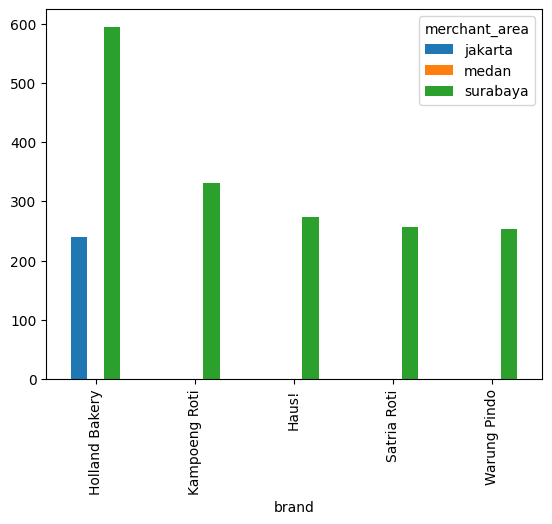

In [ ]:
display('Surabaya most Brand repeat order ? ', sby)
sby.plot(kind='bar')

### Most Product By Category

In [ ]:
data_category = df.copy()
data_category[['category1','category2','category3','category4','category5']] = data_category['category'].str.split('/',expand=True,n=5)
     

In [ ]:
cat1 = data_category['category1'].unique().tolist()
cat2 = data_category['category2'].unique().tolist()
cat3 = data_category['category3'].unique().tolist()
cat4 = data_category['category4'].unique().tolist()
cat5 = data_category['category5'].unique().tolist()

cat = cat1 + cat2 + cat3 + cat4 + cat5
cat = list(set(cat))
cat = [x for x in cat if x is not None]
print(cat)

['Sweets', 'Minuman', 'Chinese', 'Aneka nasi', 'Roti', 'Seafood', 'India', 'Korea', 'Thailand', 'Bakso & soto', 'Ayam & bebek', 'Martabak', 'Jepang', 'Kopi', 'Cepat saji', 'Pizza & pasta', 'Sate', 'Barat', 'Timur Tengah', 'Jajanan', 'Bakmie']


In [ ]:
city = df['merchant_area'].unique()
kota = []
kategori = []
jenis_produk = []

for i in city:
  data_city = df[df.merchant_area==i]
  for j in cat:
    jenis_produk.append(data_city[data_city.category.str.startswith(j)]['product'].value_counts().sort_values(ascending=False)[:5].index.tolist())
    kota.append(i)
    kategori.append(j)
    #jlh_merchant.append(n)
    #print('kota {} jumlah merchent brand {} sebanyak {}'.format(i,j,n))

df = pd.DataFrame(list(zip(kota, kategori, jenis_produk)),columns =['Kota', 'Kategori', 'Jenis Produk'])
     

In [ ]:
jkt = df[df.Kota=='jakarta']
display('Jakarta most Produk by Kategori ?', jkt)
print('\n')
mdn = df[df.Kota=='medan']
display('Medan most Produk by Kategori ?', mdn)
print('\n')
sby = df[df.Kota=='surabaya']
display('Surabaya most Produk by Kategori ?', sby)

'Jakarta most Produk by Kategori ?'

,Kota,Kategori,Jenis Produk
0,jakarta,Sweets,"[Mango Cassata, Triple Decker, Red Velvet, Ope..."
1,jakarta,Minuman,"[Red Velvet, Lychee Tea, Vanilla Latte, Peach ..."
2,jakarta,Chinese,"[Tiam MIE, TiamMie, Nasi Goreng Sapi, Kwetiaw ..."
3,jakarta,Aneka nasi,"[Ice Matcha Latte, Nasi, French Fries, Samosa,..."
4,jakarta,Roti,"[Cappuccino, Chicken Floss Top, Americano, Cho..."
5,jakarta,Seafood,"[Bebek Goreng, Bebek Belur Cabe Ijo, Cumi Tumi..."
6,jakarta,India,"[Trio Wrap Favorite, Japanese Curry Chicken Ri..."
7,jakarta,Korea,"[Kimchi, Nasi Putih, Mineral Water, Jeyuk Bokk..."
8,jakarta,Thailand,[]
9,jakarta,Bakso & soto,"[Jus Jambu, Soda Susu, Jus Mangga, Jus Alpukat..."


'Medan most Produk setiap Kategori ='

,Kota,Kategori,Jenis Produk
21,medan,Sweets,"[Combo 1., Iced Black Tea, Combo 3, Combo 4, L..."
22,medan,Minuman,"[Lemon Tea, Americano, Taro, French Fries, Red..."
23,medan,Chinese,"[Khua Chai Phui (Tersedia Di Hari Sabtu), Hokk..."
24,medan,Aneka nasi,"[Nasi Putih, Nasi Goreng Telur, Kentang Goreng..."
25,medan,Roti,"[Abon Ayam, Tawar Cake Coklat, Mocca, Pizza Bu..."
26,medan,Seafood,"[Nasi Putih, Cumi Goreng Tepung, Bihun Goreng ..."
27,medan,India,"[Martabak Telur Ayam ( 2 Telur ), Martabak Tel..."
28,medan,Korea,"[Paket Mozzarella Choco + Mozzarella Tiramisu,..."
29,medan,Thailand,"[Tropical Appleberries, Tropical Orangeberries..."
30,medan,Bakso & soto,"[Juice Terong Belanda, Juice Kuini, Juice Jeru..."


'Surabaya most Produk setiap Kategori ='

,Kota,Kategori,Jenis Produk
42,surabaya,Sweets,"[9 Pcs Croffle, HOT AMERICANO, ICE AMERICANO, ..."
43,surabaya,Minuman,"[Lychee Tea, Lemon Tea, Americano, Mango Yakul..."
44,surabaya,Chinese,"[Nasi Putih, Nasi Goreng Seafood, Nasi Goreng ..."
45,surabaya,Aneka nasi,"[Nasi Putih, Es Teh, Nasi Goreng Ayam, Es Jeru..."
46,surabaya,Roti,"[Roti Tawar Kupas, Roti Tawar Kulit, Roti Kaca..."
47,surabaya,Seafood,"[Cah Tauge, Apapun Makanannya... Ketik Salah S..."
48,surabaya,India,[]
49,surabaya,Korea,"[Saitama Saida, Okayama Cookies, Tokyo Locama,..."
50,surabaya,Thailand,"[Tomyum Seafood, Padthai, Salad Pepaya Muda, N..."
51,surabaya,Bakso & soto,"[Nasi Krengsengan, Sate Puyuh, Jus Alpukat, Es..."


In [ ]:
df['product'].head(10)

0    Hot Almara Kopi (kopi Susu Gula Aren)
1    Ice Almara Kopi (kopi Susu Gula Aren)
2                              Hot Millsis
3                              Ice Millsis
4                              Hot Millbro
5                              Ice Millbro
6                          Hot 330 Helateh
7                          Ice 330 Helateh
8                           Hot Ilusi Kopi
9                           Ice Ilusi Kopi
Name: product, dtype: object